# **Homework 4**

Due: **October 22, 5pm** (late submission until October 25th, 5pm -- no submission possible afterwards)

Coding assignment: 25 points

Project report: 15 points

### Name: [Yawen Tan]

### Link to the github repo: [https://github.com/IsabellaTan/Brown-DATA2060-HW4#]

#### Run the evironment test below, make sure you get all green checks. If not, you will lose 2 points for each red or missing sign.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.11"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.11"):
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.10.5", 'numpy': "2.3.2",'sklearn': "1.7.1", 
                'pandas': "2.3.2", 'pytest': "8.4.1", 'torch':"2.7.1"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.11

[ OK ] matplotlib version 3.10.5 is installed.
[ OK ] numpy version 2.3.2 is installed.
[ OK ] sklearn version 1.7.1 is installed.
[ OK ] pandas version 2.3.2 is installed.
[ OK ] pytest version 8.4.1 is installed.
[ OK ] torch version 2.7.1 is installed.


## **Coding Assignment** (25 points)

### Introduction
In this assignment, you'll implement Binary Logistic Regression with
regularization to perform classification. This classification task is to
predict whether or not a given patient has breast cancer based on health
data. The regularization method that you will be using is Tikhonov
regularization (L2 norm). You will also do cross-validation.

### Stencil Code & Data

We have provided the following stencil code within this file:

-   `models` contains the `RegularizedLogisticRegression` model which
    you will be implementing.
    
-   `main` is the entry point of your program which will read in the
    data, run the classifier and print the results.

-   `Check Model` contains a series of tests to ensure you are coding your 
    model properly.
    
You should not modify any code in the `main`. If you do for debugging
or other purposes, please make sure any additions are commented out in
the final handin. Do not modify or move the `Check Model` cell! If you 
do so, you will lose points. The unit tests in that cell make it easy 
to grade your solution. All the functions you need to fill in reside 
in this notebook, marked by `TODO`s. You can see a full description 
of them in the section below.

### UCI Breast Cancer Wisconsin (Diagnostic) Data Set 

You will use a preprocessed version of the Breast Cancer Wisconsin
(Diagnostic) Data Set from UC Irvine's Machine Learning Repository site.
You can read more about the dataset here at
<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>.
We have split it up into train and validation sets already
for you and read them in in `main`.

## **The Assignment**

We provide you with a sigmoid function to use when training your data.
In `models`, there are five functions you will implement. They are:

-   `RegularizedLogisticRegression`:

    -   **`train()`** uses batch stochastic gradient descent to learn
        the weights. You may find your solution from HW03 to be helpful,
        but in this assignment, we will train for a finite number of
        epochs rather than until we reach a particular convergence
        criteria. The weight update step for this assignment will also
        be different from HW03.

    -   **`predict()`** predicts the labels using the inputs of test
        data.

    -   **`accuracy()`** computes the percentage of the correctly
        predicted labels over a dataset.

    -   **`runTrainTestValSplit()`** trains and evaluates for multiple
        values of the hyperparameter lambda. This function evaluates
        models by using train/validation sets, and
        returns lists of training and validation errors with respect to
        each value of lambda.

    -   **`runKFold()`** evaluates models by implementing k-fold cross
        validation, and returns a list of errors with respect to each
        value of lambda. Note that we have defined
        `_kFoldSplitIndices()` for you, which you may find helpful when
        implementing this function.

*Note*: You are not allowed to use any off-the-shelf packages that have
already implemented these models, such as scikit-learn. We're asking you
to implement them yourself.

### **Binary Logistic Regression**

Similar to homework 3, we are again implementing Logistic Regression for
classification. However, note that there are a few key differences. For
this assignment, we are performing binary classification, which is a
special case of multi-class classification. We are also implementing
regularization, so you should think about how you would need to modify
the loss function and gradient provided below to include regularization.
For this problem, there are only two classes, which are denoted by
$\{0, 1\}$ labels.\
Our model will perform the following:

$$h(x) = \frac{1}{1 + e^{-<w, x>}}$$

where $w$ is the model's weights and $h(x)$ is the probability that the
data point $x$ has a label of 1. We have implemented this as
`sigmoid_function()` for you.\
\
Our loss function will be Binary Log Loss, also called Binary Cross
Entropy Loss:

$$L_S(h) = -\frac{1}{m} \sum_{i=1}^m (y_i \log h(x_i) + (1 - y_i)\log (1 - h(x_i)))$$

on a sample $S$ of $m$ data points. Therefore, the corresponding
gradient of the Binary Log loss with respect to the model's weights is
$$\frac{\partial L_S(h)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m (h(x_i) - y_i)x_{ij}$$

### **Regularize with Tikhonov Regularization**

As mentioned in the introduction part, with Tikhonov regularization, you
just need to implement the L2 norm of the weights, which is
$\lambda||w||_2^2 = \lambda\sum_{i=1}^{d}w_i^2$

With that added, the gradient used to update the weights has to be adjusted to include
$$\frac{\partial \lambda\sum_{i=1}^{d}w_i^2}{\partial w_j} = 2\lambda w_j$$
Notice that the $\lambda$ parameter above is used to control the
contribution of the regularization term to the overall learning process
that you may have to tune a little bit when implementing the code.

## **Model**

In [6]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid_function(x):
    return 1.0 / (1.0 + np.exp(-x))

class RegularizedLogisticRegression(object):
    '''
    Implement regularized logistic regression for binary classification.
    The weight vector w should be learned by minimizing the regularized loss
    L(h, (x,y)) = log(1 + exp(-y <w, x>)) + lambda |w|_2^2. In other words, the objective
    function that we are trying to minimize is the log loss for binary logistic regression 
    plus Tikhonov regularization with a coefficient of lambda.
    '''
    def __init__(self, batch_size = 15):
        self.learningRate = 0.00001 # Feel free to play around with this if you'd like, though this value will do
        self.num_epochs = 10000 # Feel free to play around with this if you'd like, though this value will do
        self.batch_size = batch_size # Feel free to play around with this if you'd like, though this value will do
        self.weights = None
        self.lmbda = 2.5 # tune this parameter

    def train(self, X, Y):
        '''
        Train the model, using batch stochastic gradient descent
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            None
        '''
        #[TODO]
        
        # Convert X and Y to float type
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)
        # Get number of examples and features
        num_examples, num_features = X.shape

        # Initialize weights
        self.weights = np.zeros((1, X.shape[1]))

        # Loop over epochs
        for epoch in range(self.num_epochs):
            # Generate a list of indices
            indices = list(range(num_examples))
            # shuffle the indices
            np.random.shuffle(indices)
            # Order X and Y according to the shuffled indices
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]
            # Loop over batches
            for start in range(0, num_examples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                Y_batch = Y_shuffled[start:end]
                m_batch = X_batch.shape[0]
                # if batch is empty, skip
                if m_batch == 0:
                    continue
                # Calculate z = X * w^T
                z = X_batch.dot(self.weights.T).reshape(-1)
                # Find the predictions
                h = sigmoid_function(z)
                # Calculate gradient without regularization (1/m) * X^T * (h - y)
                diff = (h - Y_batch)
                grad_no_reg = (X_batch.T.dot(diff) / m_batch).reshape(num_features, 1)
                # Calculate L2 regularization gradient 2 * lambda * w
                grad_reg = 2 * self.lmbda * self.weights.T
                # Calculate total gradient
                grad_total = grad_no_reg + grad_reg
                # Update weights
                self.weights = self.weights - self.learningRate * grad_total.T
        # Convert weights to array
        self.weights = np.array(self.weights, dtype=float)


    def predict(self, X):
        '''
        Compute predictions based on the learned parameters and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            A 1D Numpy array with one element for each row in X containing the predicted class.
        '''
        #[TODO]
        # Convert X to float type
        X = np.array(X, dtype=float)
        # Calculate z = X * w^T
        z = X.dot(self.weights.T).reshape(-1)
        # Calculate predicted probabilities
        probs = sigmoid_function(z)
        # Covert probabilities to class labels, using threshold 0.5 
        # if prob >= 0.5, predict 1, else predict 0
        preds = (probs >= 0.5).astype(int)
        # return predictions
        return preds
        

    def accuracy(self,X, Y):
        '''
        Output the accuracy of the trained model on a given testing dataset X and labels Y.
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            a float number indicating accuracy (between 0 and 1)
        '''
        #[TODO]
        # Convert X and Y to float and int types respectively
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=int)
        # Predict labels for X
        preds = self.predict(X)  # 1D numpy array, 0/1
        # Count correct predictions
        correct = np.sum(preds == Y)
        # Calculate accuracy = number of correct prediction / total number of samples
        accuracy = correct / len(Y)
        # return accuracy
        return accuracy

    def runTrainTestValSplit(self, lambda_list, X_train, Y_train, X_val, Y_val):
        '''
        Given the training and validation data, fit the model with training data and test it with
        respect to each lambda. Record the training error and validation error, which are equivalent 
        to (1 - accuracy).
        @params:
            lambda_list: a list of lambdas
            X_train: a 2D Numpy array for trainig where each row contains an example,
            padded by 1 column for the bias
            Y_train: a 1D Numpy array for training containing the corresponding labels for each example
            X_val: a 2D Numpy array for validation where each row contains an example,
            padded by 1 column for the bias
            Y_val: a 1D Numpy array for validation containing the corresponding labels for each example
        @returns:
            train_errors: a list of training errors with respect to the lambda_list
            val_errors: a list of validation errors with respect to the lambda_list
        '''
        train_errors = []
        val_errors = []
        #[TODO] train model and calculate train and validation errors here for each lambda
        # Loop over each lambda
        for lmbda in lambda_list:
            # Set lambda
            self.lmbda = lmbda
            # Train the model
            self.train(X_train, Y_train)
            # Calculate and record training and validation errors
            train_errors.append(1 - self.accuracy(X_train, Y_train))
            val_errors.append(1 - self.accuracy(X_val, Y_val))
        # return results
        return train_errors, val_errors


    def _kFoldSplitIndices(self, dataset, k):
        '''
        Helper function for k-fold cross validation. Evenly split the indices of a
        dataset into k groups.
        For example, indices = [0, 1, 2, 3] with k = 2 may have an output
        indices_split = [[1, 3], [2, 0]].
        
        Please don't change this.
        @params:
            dataset: a Numpy array where each row contains an example
            k: an integer, which is the number of folds
        @return:
            indices_split: a list containing k groups of indices
        '''
        num_data = dataset.shape[0]
        fold_size = int(num_data / k)
        indices = np.arange(num_data)
        np.random.shuffle(indices)
        indices_split = np.split(indices[:fold_size*k], k)
        return indices_split

    def runKFold(self, lambda_list, X, Y, k = 3):
        '''
        Run k-fold cross validation on X and Y with respect to each lambda. Return all k-fold
        errors.
        
        Each run of k-fold involves k iterations. For an arbitrary iteration i, the i-th fold is
        used as testing data while the rest k-1 folds are combined as one set of training data. The k results are
        averaged as the cross validation error.
        @params:
            lambda_list: a list of lambdas
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
            k: an integer, which is the number of folds, k is 3 by default
        @return:
            k_fold_errors: a list of k-fold errors with respect to the lambda_list
        '''
        k_fold_errors = []
        for lmbda in lambda_list:
            self.lmbda = lmbda
            #[TODO] call _kFoldSplitIndices to split indices into k groups randomly
            fold_indices = self._kFoldSplitIndices(X, k)
            fold_errors = []
            #[TODO] for each iteration i = 1...k, train the model using lmbda
            # on k−1 folds of data. Then test with the i-th fold.
            for i in range(k):
                # Get the ith fold as validation set
                val_idx = fold_indices[i]
                # Get validation data
                X_val_fold = X[val_idx]
                Y_val_fold = Y[val_idx]
                # Get training data by combining other folds
                train_idx_list = []  # set up an empty list to hold training indices
                for j in range(k):
                    if j != i: # skip the validation fold
                        train_idx_list += list(fold_indices[j])  # add indices from other folds
                # Convert to numpy array
                train_idx = np.array(train_idx_list)
                # Get training data
                X_train_fold = X[train_idx]
                Y_train_fold = Y[train_idx]
                # Train the model on training fold
                self.train(X_train_fold, Y_train_fold)
                # Calculate and record fold error
                fold_error = 1 - self.accuracy(X_val_fold, Y_val_fold) # error = 1 - accuracy
                fold_errors.append(fold_error)
            #[TODO] calculate and record the cross validation error by averaging total errors
            k_fold_errors.append(np.mean(fold_errors))

        return k_fold_errors

    def plotError(self, lambda_list, train_errors, val_errors, k_fold_errors):
        '''
        Produce a plot of the cost function on the training and validation sets, and the
        cost function of k-fold with respect to the regularization parameter lambda. Use this plot
        to determine a valid lambda.
        @params:
            lambda_list: a list of lambdas
            train_errors: a list of training errors with respect to the lambda_list
            val_errors: a list of validation errors with respect to the lambda_list
            k_fold_errors: a list of k-fold errors with respect to the lambda_list
        @return:
            None
        '''
        plt.figure()
        plt.semilogx(lambda_list, train_errors, label = 'training error')
        plt.semilogx(lambda_list, val_errors, label = 'validation error')
        plt.semilogx(lambda_list, k_fold_errors, label = 'k-fold error')
        plt.xlabel('lambda')
        plt.ylabel('error')
        plt.legend()
        plt.show()

## **Check Model**

In [5]:
import pytest
# Sets random seed for testing purposes
np.random.seed(0)
random.seed(0)

# Creates Test Models
test_model1 = RegularizedLogisticRegression(3)
test_model2 = RegularizedLogisticRegression(3)

# Creates Test Data
x_bias = np.array([[0,4,1], [0,3,1], [5,0,1], [4,1,1], [0,5,1]])
y = np.array([0,0,1,1,0])
x_bias_test = np.array([[0,0,1], [-5,3,1], [9,0,1], [1,0,1], [6,-7,1]])
y_test = np.array([0,0,1,0,1])

x_bias2 = np.array([[0,0,1], [0,3,1], [4,0,1], [6,1,1], [0,1,1], [0,4,1]])
y2 = np.array([0,1,1,1,0,1])
x_bias_test2 = np.array([[0,0,1], [-5,-3,1], [9,0,1], [1,0,1]])
y_test2 = np.array([0,0,1,0])


# Test Train Model and Checks Model Weights
test_model1.train(x_bias, y)
weights1 = test_model1.weights
assert isinstance(weights1, np.ndarray)
assert weights1.ndim==2 and weights1.shape == (1,3)
assert weights1 == pytest.approx(np.array([[0.12661045, -0.14658517, -0.01241918]]), 0.05)

test_model2.train(x_bias2, y2)
weights2 = test_model2.weights
assert isinstance(weights2, np.ndarray)
assert weights2.ndim==2 and weights2.shape == (1,3)
assert weights2 == pytest.approx(np.array([[0.11113, 0.08361, 0.01943]]), 0.05) 

# Test Model Predict
predict1 = test_model1.predict(x_bias_test)
assert isinstance(predict1, np.ndarray)
assert predict1.ndim==1 and predict1.shape==(5,)
assert (predict1 == np.array([0, 0, 1, 1, 1])).all()

predict2 = test_model2.predict(x_bias_test2)
assert isinstance(predict2, np.ndarray)
assert predict2.ndim==1 and predict2.shape==(4,)
assert (test_model2.predict(x_bias_test2) == np.array([1, 0, 1, 1])).all()

# Test Model Accuracy
accuracy1 = test_model1.accuracy(x_bias_test, y_test)
assert isinstance(accuracy1, float)
assert accuracy1 == .8

accuracy2 = test_model2.accuracy(x_bias_test2, y_test2)
assert isinstance(accuracy2, float)
assert accuracy2 == .5

from datetime import date
#[TODO] Print your name and the date, using today function from date 
print('Name: Yawen Tan')
print('Date:', date.today())

Name: Yawen Tan
Date: 2025-10-22


## **Main**

Train Accuracy: 0.9340659340659341
Validation Accuracy: 0.9649122807017544
[1000, 100, 10, 1, 0.1, 0.01, 0.001]
[np.float64(0.07472527472527468), np.float64(0.07252747252747249), np.float64(0.07252747252747249), np.float64(0.05934065934065935), np.float64(0.03516483516483515), np.float64(0.03516483516483515), np.float64(0.03516483516483515)] [np.float64(0.03508771929824561), np.float64(0.03508771929824561), np.float64(0.03508771929824561), np.float64(0.03508771929824561), np.float64(0.02631578947368418), np.float64(0.02631578947368418), np.float64(0.02631578947368418)] [np.float64(0.0652557319223986), np.float64(0.06701940035273372), np.float64(0.06349206349206353), np.float64(0.0564373897707231), np.float64(0.04409171075837748), np.float64(0.03703703703703709), np.float64(0.04232804232804236)]


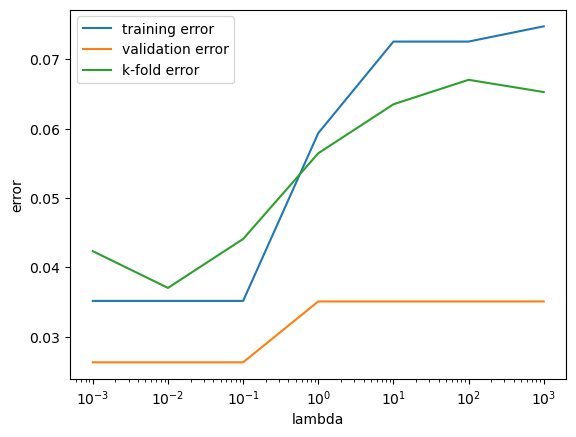

In [7]:
def extract():
    X_train = pd.read_csv('data/X_train.csv',header=None)
    Y_train = pd.read_csv('data/y_train.csv',header=None)
    X_val = pd.read_csv('data/X_val.csv',header=None)
    Y_val = pd.read_csv('data/y_val.csv',header=None)

    Y_train = np.array([i[0] for i in Y_train.values])
    Y_val = np.array([i[0] for i in Y_val.values])

    X_train = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_val = np.append(X_val, np.ones((len(X_val), 1)), axis=1)

    return X_train, X_val, Y_train, Y_val

def main():
    X_train, X_val, Y_train, Y_val = extract()
    X_train_val = np.concatenate((X_train, X_val))
    Y_train_val = np.concatenate((Y_train, Y_val))

    RR = RegularizedLogisticRegression()
    RR.train(X_train, Y_train)
    print('Train Accuracy: ' + str(RR.accuracy(X_train, Y_train)))
    print('Validation Accuracy: ' + str(RR.accuracy(X_val, Y_val)))

    #[TODO] Once implemented, uncomment the following lines of code and:
    # 1. implement runTrainTestValSplit to get the training and validation errors of our 70-15-15
    #    split to the original dataset
    # 2. implement runKFold to generate errors of each lambda, where k = 3 in this assignment
    # 3. call plotError to plot those errors with respect to lambdas
    
    lambda_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    train_errors, val_errors = RR.runTrainTestValSplit(lambda_list, X_train, Y_train, X_val, Y_val)
    k_fold_errors = RR.runKFold(lambda_list, X_train_val, Y_train_val, 3)
    print(lambda_list)
    print(train_errors, val_errors, k_fold_errors)
    RR.plotError(lambda_list, train_errors, val_errors, k_fold_errors)
    
    
# Set random seeds. DO NOT CHANGE THIS IN YOUR FINAL SUBMISSION.
np.random.seed(0)
random.seed(0)
main()


## **Project Report** (15 points)

### **Question 1**
Briefly explain how you used batch stochastic gradient descent with
regularization to learn the weights. Think about how the
regularization is incorporated into the loss function and how that
affects the gradient when updating weights.

**Solution:**

In the process of batch stochastic gradient descent (SGD) to learn the weights of the logistic regression model, I initialize the weight first. And in each epoch, shuffle the training data and divide it into batches. For each batch, compute the predicted probabilities using the sigmoid function, calculate the gradient of the logistic loss, and add the L2 regularization term 2λw to the gradient. The weights are then updated by subtracting the learning rate times the total gradient.

The regularization is incorporated into the loss function as an L2 penalty on the weights. It adds 2λw to the gradient, which discourages large weights and helps prevent overfitting.

### **Question 2**

Use `plotError()`, which we have implemented for you, to produce a
model selection curve. Include your plot here. Then, conclude what
the best value of lambda is and explain why. <br>
*Note: It takes about 10-15 minutes to generate a graph.*


**Solution:**

<<img src="graph.png" width="500">


The best λ is 0.01.

For the training error (blue), when λ is small (0.001–0.01), the error remains low and nearly flat, showing that the model fits the training data well under weak regularization. As λ increases beyond 0.1, the training error rises sharply, which reflects stronger L2 regularization shrinking model weights and reducing flexibility — leading to underfitting.

For the validation error (orange), the minimum occurs near λ = 0.01. When λ < 0.01, there is no further improvement, suggesting that very weak regularization provides little additional benefit. When λ ≥ 0.1, the validation error steadily increases, indicating over-regularization.

For the k-fold error (green), the average generalization error across folds decreases toward λ = 0.01 and then increases again, following a similar trend to the validation curve.

Thus, λ = 0.01 achieves the best balance between bias and variance — it keeps the training error low while minimizing both validation and k-fold errors, leading to the strongest generalization performance.


### **Question 3**
In this project, you used validation data to select a model. Suppose
that each patient might've had multiple samples (e.g., multiple lab
tests or x-rays) collected and entered into the dataset. Would you
need to account for this when splitting your train-validation-test
data? If yes, how? If no, why not? (3-5 sentences)

**Solution:**

Yes, we need to account for this. If a single patient has multiple samples in the dataset, splitting the data randomly could place some of their samples in the training set and others in the validation or test set. This would lead to data leakage because the model could “see” information about the same patient during training that appears in validation or testing, artificially inflating performance. To prevent this, all samples from the same patient should be grouped together and assigned entirely to either the training, validation, or test set. This ensures that the model is evaluated on entirely unseen patients, providing a more realistic measure of generalization.